Saving ._.DS_Store to ._ (2).DS_Store
Saving ._bank-additional to ._bank-additional (3)
Saving .DS_Store to .DS_Store (2)
Saving .Rhistory to .Rhistory (2)
Saving bank-additional.csv to bank-additional (2).csv
Saving bank-additional-full.csv to bank-additional-full (2).csv
Saving bank-additional-names.txt to bank-additional-names (2).txt
Saving bank.csv to bank (2).csv
Saving bank-full.csv to bank-full (2).csv
Saving bank-names.txt to bank-names (2).txt
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct      

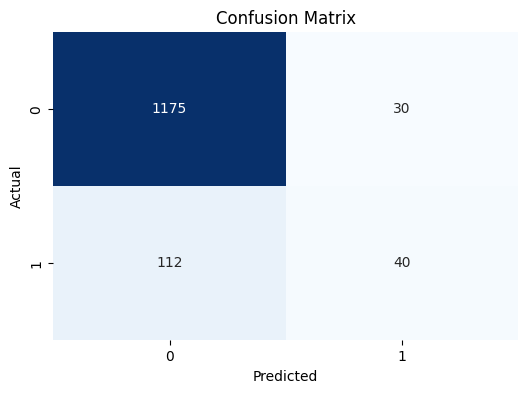

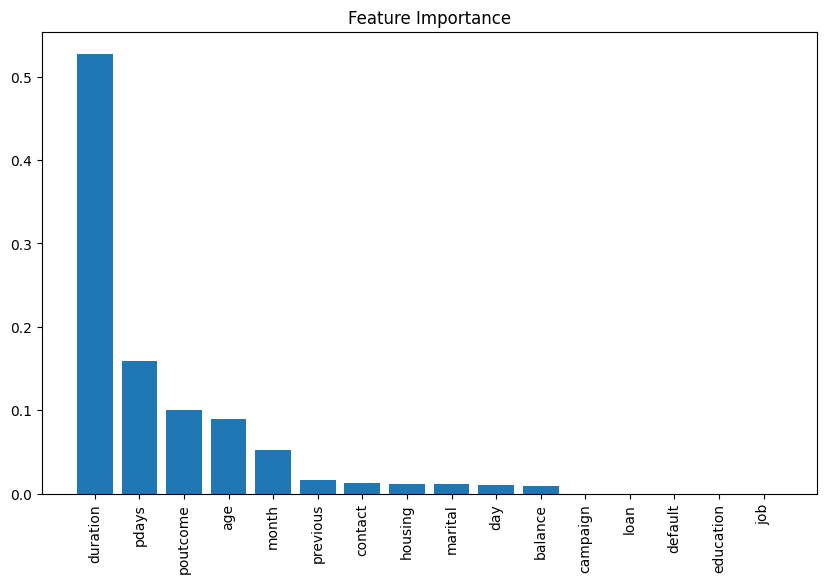

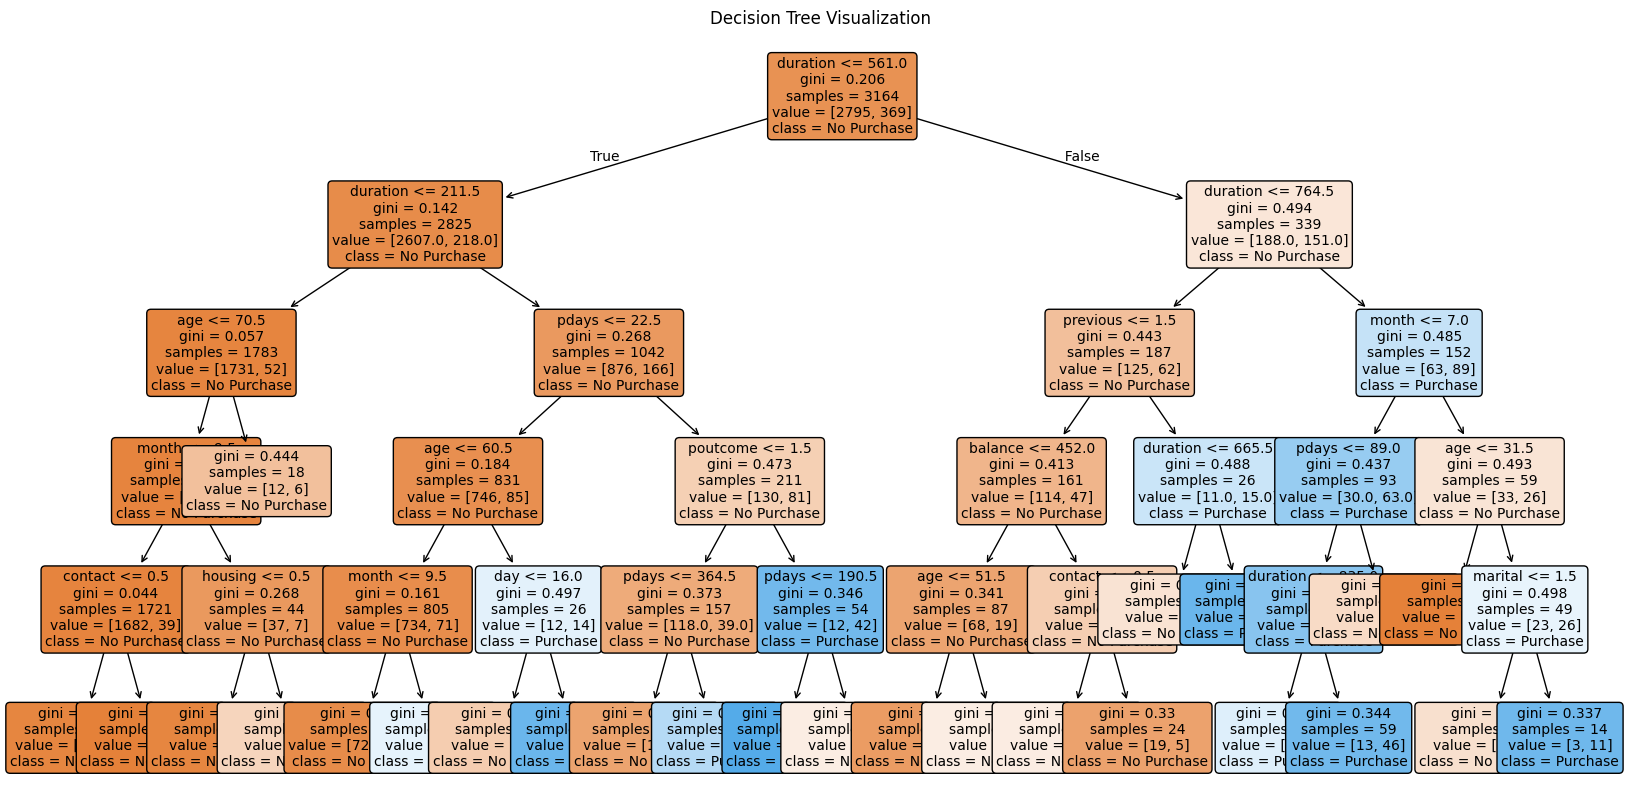

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the dataset
from google.colab import files

uploaded = files.upload()  # Manually upload the files

bank_data = pd.read_csv('bank.csv', sep=';')
bank_additional_data = pd.read_csv('bank-additional.csv', sep=';')

# Step 3: Inspect the data
print(bank_data.head())
print(bank_additional_data.head())

# Step 4: Preprocess the data
labelencoder = LabelEncoder()
for column in bank_data.columns:
    if bank_data[column].dtype == 'object':
        bank_data[column] = labelencoder.fit_transform(bank_data[column])

for column in bank_additional_data.columns:
    if bank_additional_data[column].dtype == 'object':
        bank_additional_data[column] = labelencoder.fit_transform(bank_additional_data[column])

X = bank_data.drop(columns=['y'])  # Features
y = bank_data['y']  # Target

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Build the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

clf.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 9: Print text-based outputs
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Step 10: Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Feature Importance Plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()

# Step 12: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

